## Кластеризация Ирисов

### Группа

* 22П-3
### Работал над датасетом:

* Рахмаев Данил

## Подключение необходимых библиотек и функций

In [568]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

## Загрузка датасета

In [571]:
from sklearn.datasets import load_iris
iris = load_iris()

## Разведочный анализ данных

In [573]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [574]:
iris_df = pd.DataFrame(iris.data)

In [575]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [576]:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [577]:
iris_df.shape

(150, 6)

In [578]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [579]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [580]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

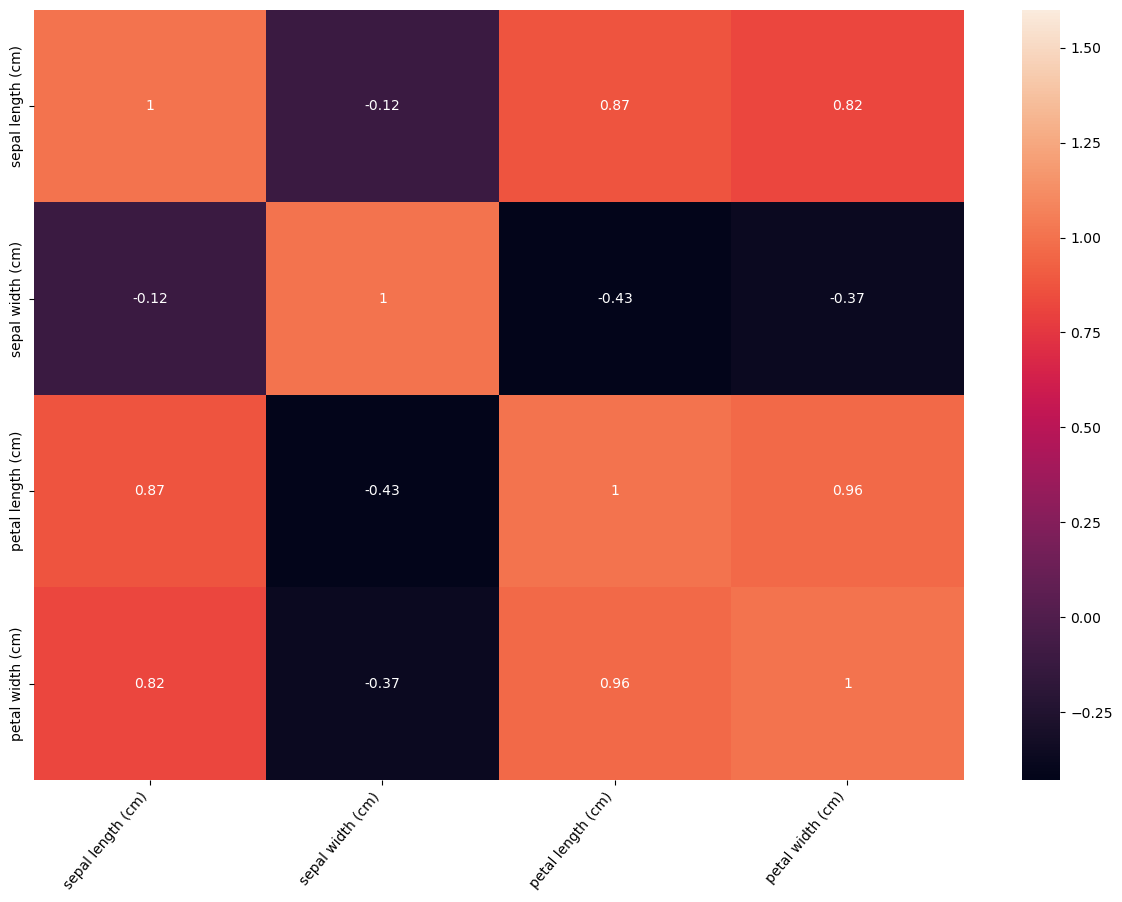

In [582]:
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');
plt.show()

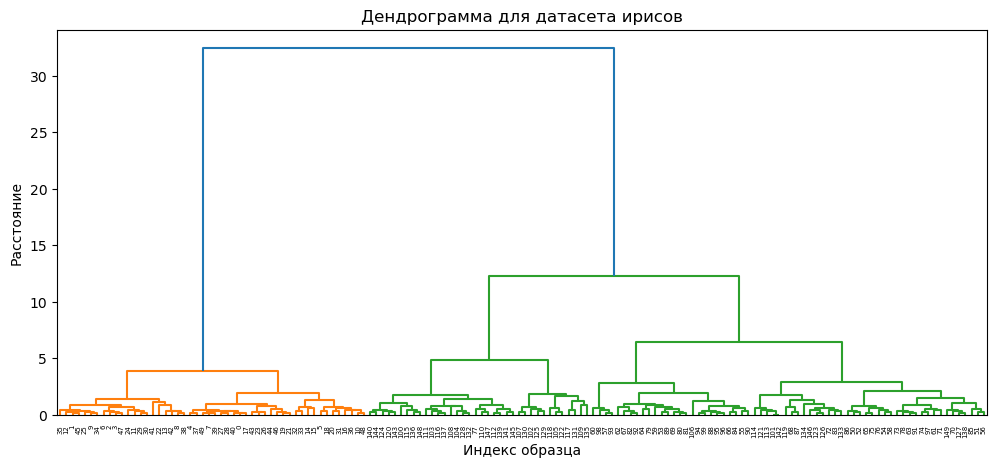

In [583]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))


plt.title('Дендрограмма для датасета ирисов')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()


In [585]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [589]:
X = iris_df.iloc[:, :-2]

In [594]:
inertia = []
range_clusters = range(1, 8)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

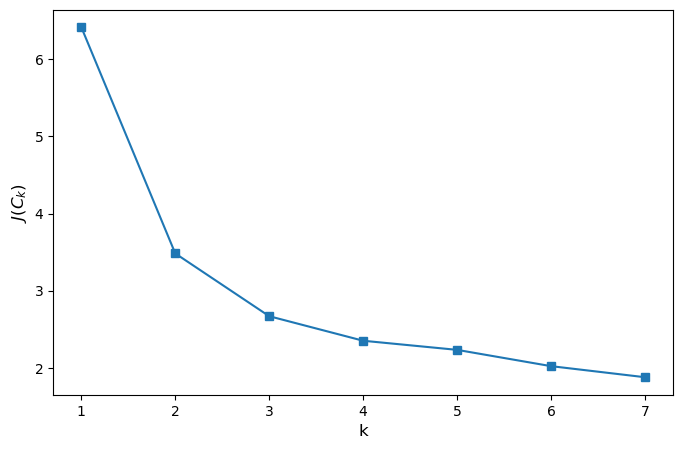

In [595]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='s', linestyle='-')
plt.xlabel('k', fontsize=12)
plt.ylabel('$J(C_k)$', fontsize=12)
plt.show()

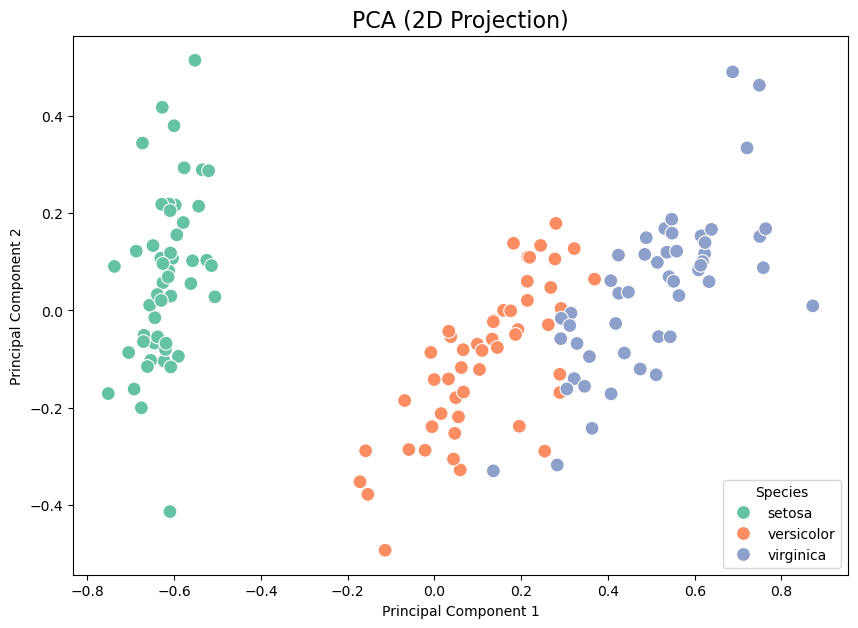

In [596]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Применяем PCA для отображения данных в 2 измерениях
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создаем DataFrame для удобства
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = iris_df['target']  # Добавляем целевую переменную

# Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=iris_df['name'], palette='Set2', s=100)
plt.title('PCA (2D Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

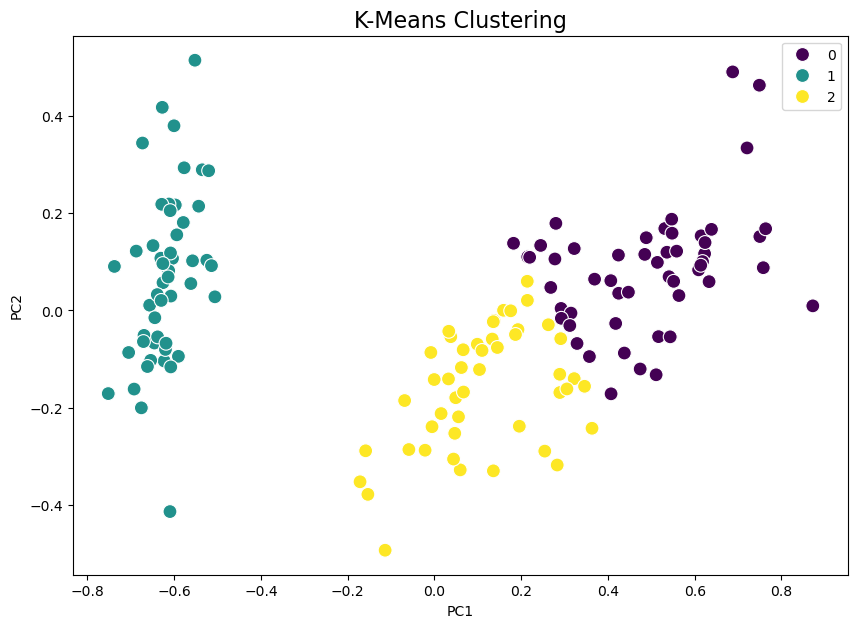

In [597]:
from sklearn.cluster import KMeans

# Кластеризация (3 кластера для трех видов ирисов)
kmeans = KMeans(n_clusters=3, random_state=42)
pred_kmeans = kmeans.fit_predict(X_scaled)

# Отображение кластеров
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_kmeans, palette='viridis', s=100)
plt.title('K-Means Clustering', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

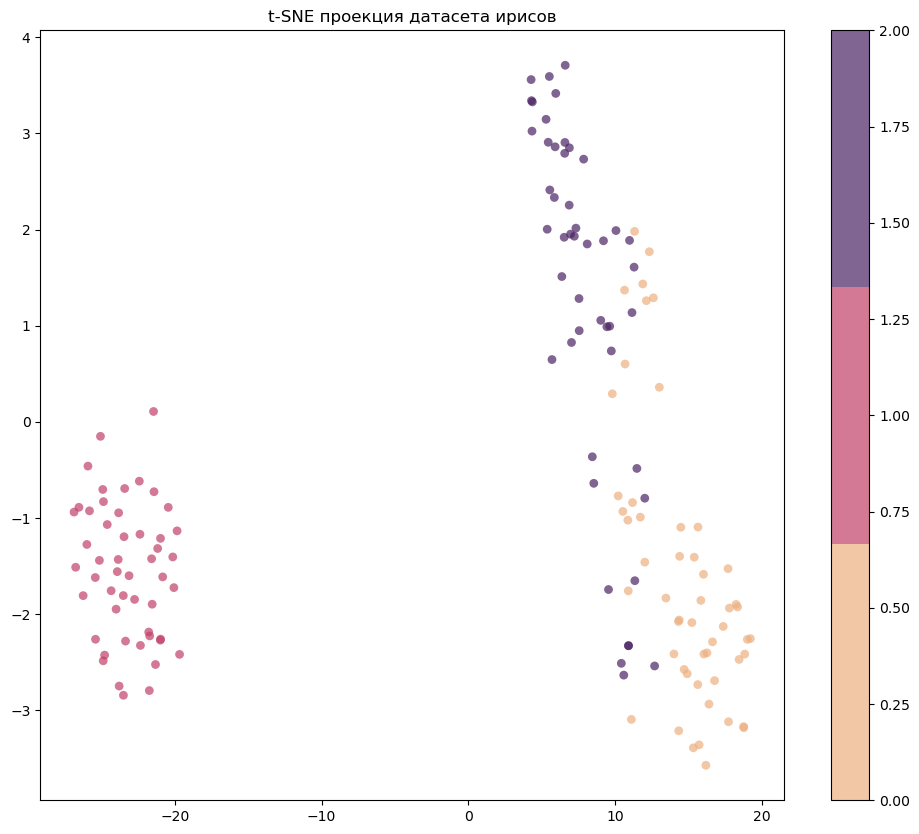

In [598]:
TSNEplot(pred_kmeans)

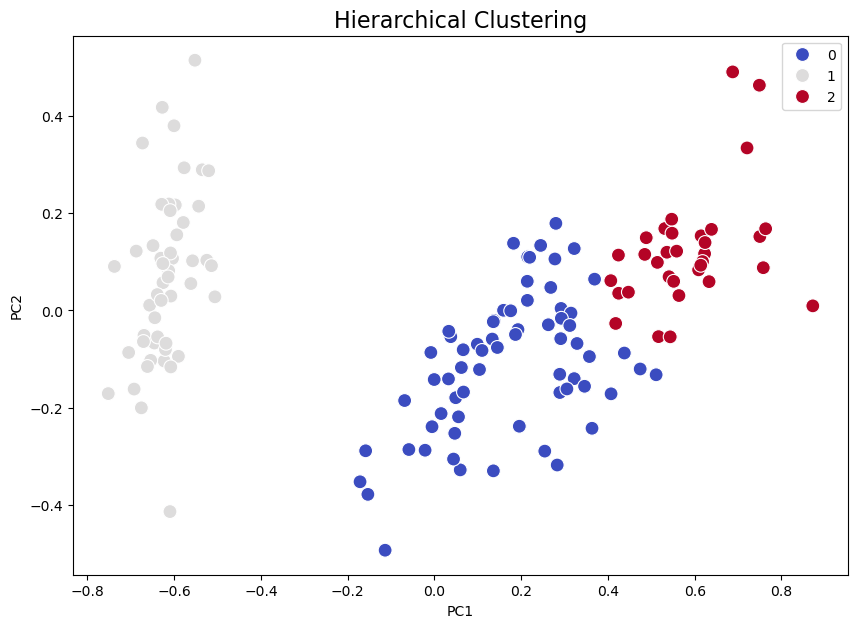

In [600]:
from sklearn.cluster import AgglomerativeClustering

# Применяем AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
pred_agg = agg_clustering.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_agg, palette='coolwarm', s=100)
plt.title('Hierarchical Clustering', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

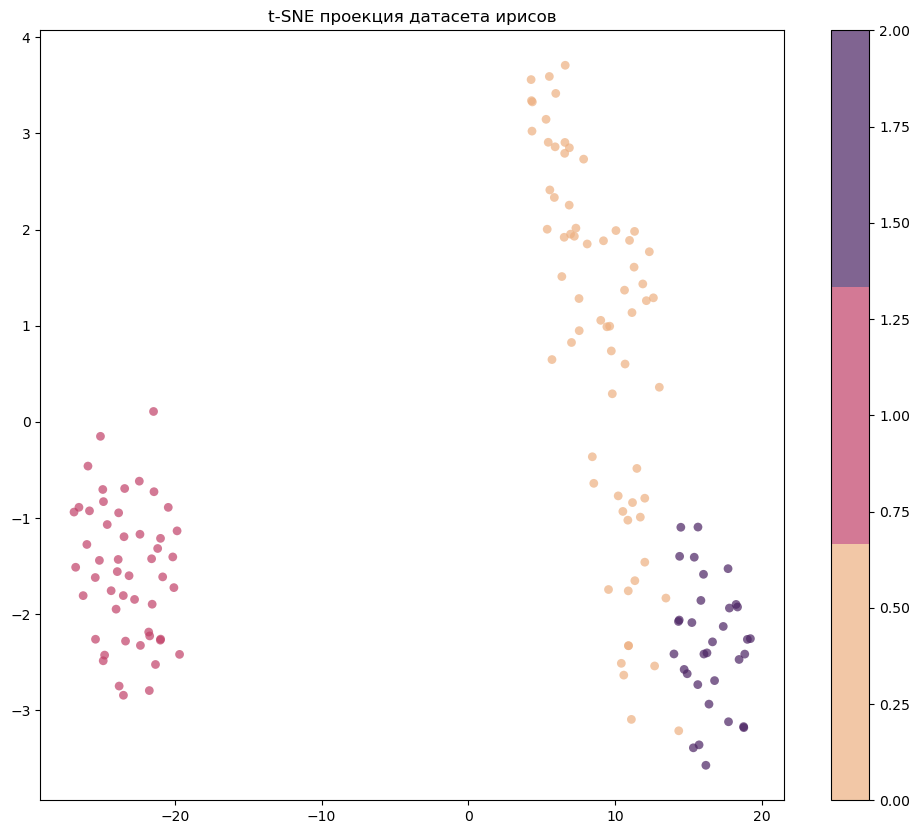

In [601]:
TSNEplot(pred_agg)

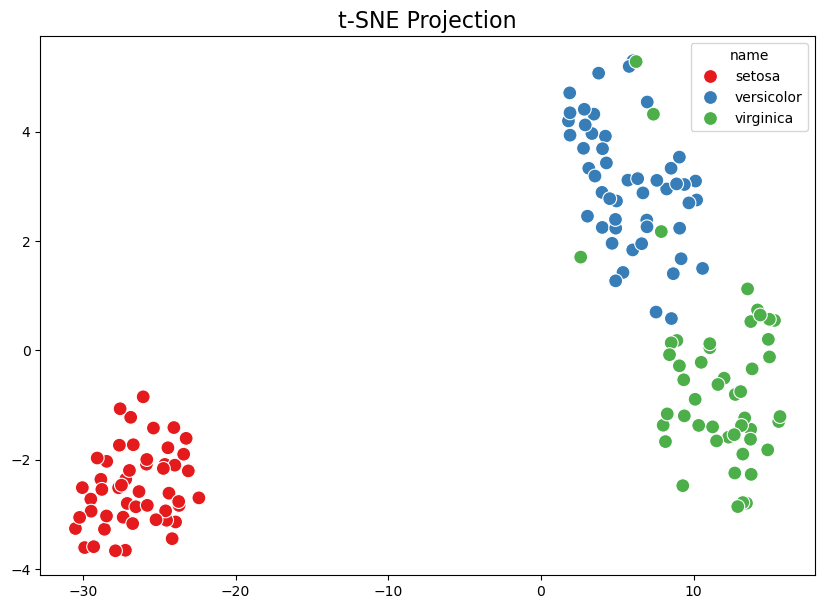

In [602]:
from sklearn.manifold import TSNE

# Применяем t-SNE к данным для визуализации
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=iris_df['name'], palette='Set1', s=100)
plt.title('t-SNE Projection', fontsize=16)
plt.show()

In [603]:
PCAplot3D(X_scaled, pred_kmeans)

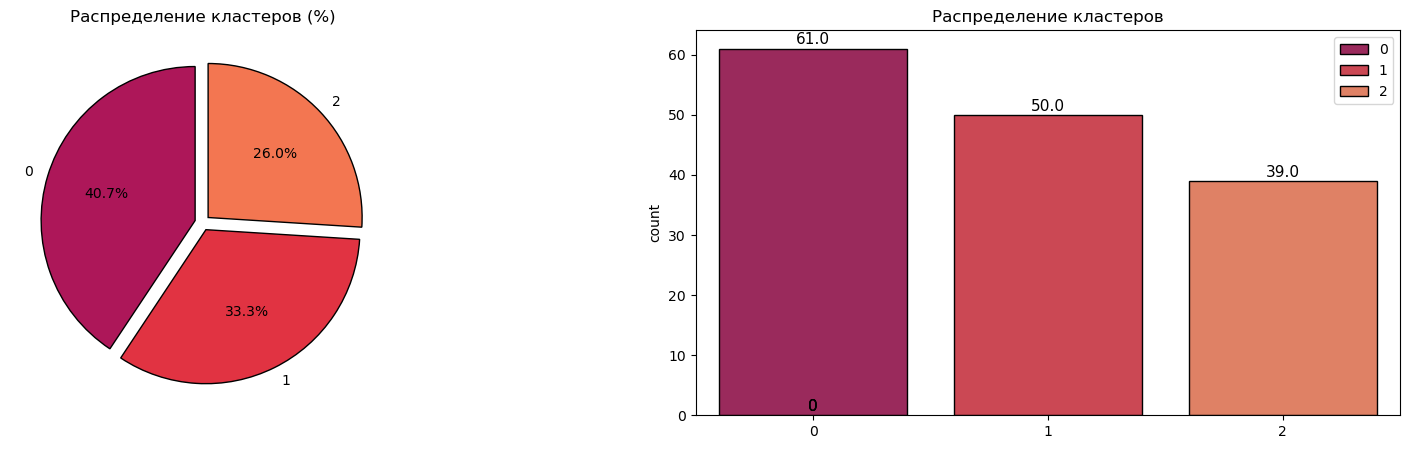

In [604]:
l = list(pd.Series(pred_k).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Распределение кластеров (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_k,
                   hue = pred_k,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров');

In [605]:
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.metrics import rand_score

kmeans = KMeans(n_clusters=3, random_state=42)
pred_kmeans = kmeans.fit_predict(X_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=3)
pred_ward = agg_clustering.fit_predict(X_scaled)

spectral_clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42)
pred_sp = spectral_clustering.fit_predict(X_scaled)

y = iris.target

rs_k = rand_score(pred_kmeans, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 150 предсказано верно \n\n\n\n".format(rs_k, rs_k * 150))

print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 150 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 150))

print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 150 предсказано верно \n".format(rs_sp, rs_sp * 150))


K-Means
_____________________________________________

 rand_score = 0.8679194630872483 

 130.18791946308724 из 150 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.8737360178970918 

 131.06040268456377 из 150 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.8322147651006712 

 124.83221476510067 из 150 предсказано верно 



In [606]:
import pandas as pd
import numpy as np

# Уменьшаем размер выборки до 40 наблюдений
sample_size = 40
X_sampled = X.sample(n=sample_size, random_state=42)

# K-means кластеризация
kmeans_sampled = KMeans(n_clusters=3, random_state=42)
pred_k_sampled = kmeans_sampled.fit_predict(X_sampled)

# Иерархическая кластеризация (метод Ward)
ward_sampled = AgglomerativeClustering(n_clusters=3)
pred_ward_sampled = ward_sampled.fit_predict(X_sampled)

# Спектральная кластеризация
sp_sampled = SpectralClustering(n_clusters=3, random_state=42)
pred_sp_sampled = sp_sampled.fit_predict(X_sampled)

# Оценка качества кластеризации
y_sampled = y[X_sampled.index]
rs_k_sampled = rand_score(kmeans_sampled.labels_, y_sampled)
rs_ward_sampled = rand_score(pred_ward_sampled, y_sampled)
rs_sp_sampled = rand_score(pred_sp_sampled, y_sampled)

print('\nРезультаты на уменьшенной выборке (40 наблюдений):')
print('\nK-Means')
print('_'*45 + '\n')
print(f" rand_score = {rs_k_sampled} \n\n {rs_k_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Agglomerative Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_ward_sampled} \n\n {rs_ward_sampled * sample_size} из {sample_size} предсказано верно \n\n\n\n")

print('Spectral Clustering')
print('_'*45 + '\n')
print(f" rand_score = {rs_sp_sampled} \n\n {rs_sp_sampled * sample_size} из {sample_size} предсказано верно \n")



Результаты на уменьшенной выборке (40 наблюдений):

K-Means
_____________________________________________

 rand_score = 0.8384615384615385 

 33.53846153846154 из 40 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.9461538461538461 

 37.84615384615385 из 40 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.9461538461538461 

 37.84615384615385 из 40 предсказано верно 



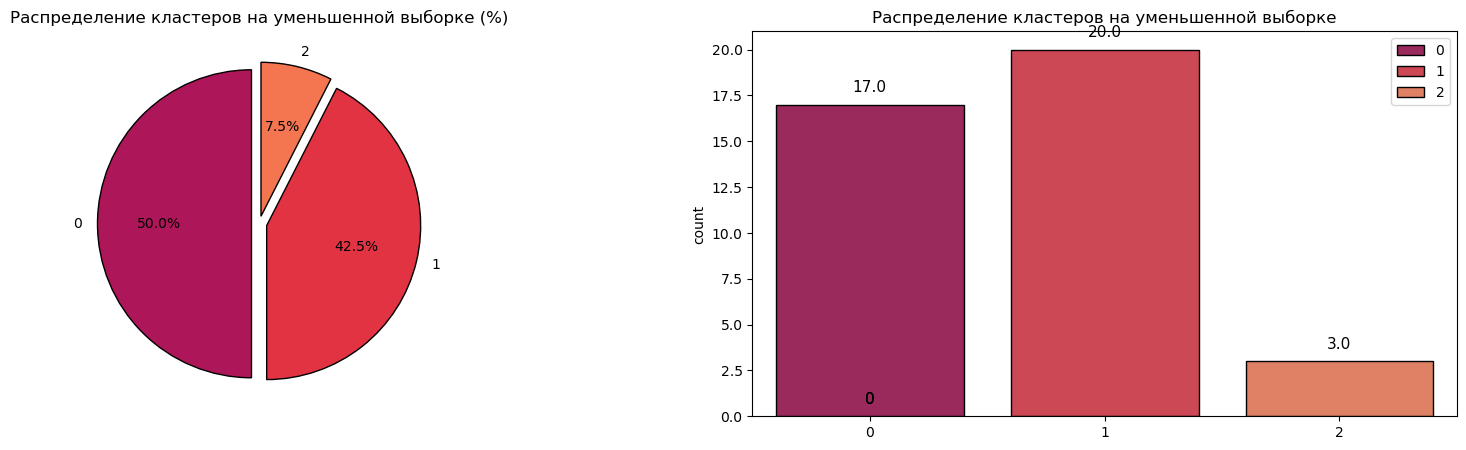

In [655]:
l = list(pd.Series(pred_k_sampled).value_counts())
sumLenn = sum(l)
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['0', '1', '2'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Распределение кластеров на уменьшенной выборке (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = pred_k_sampled,
                   hue = pred_k_sampled,
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение кластеров на уменьшенной выборке');

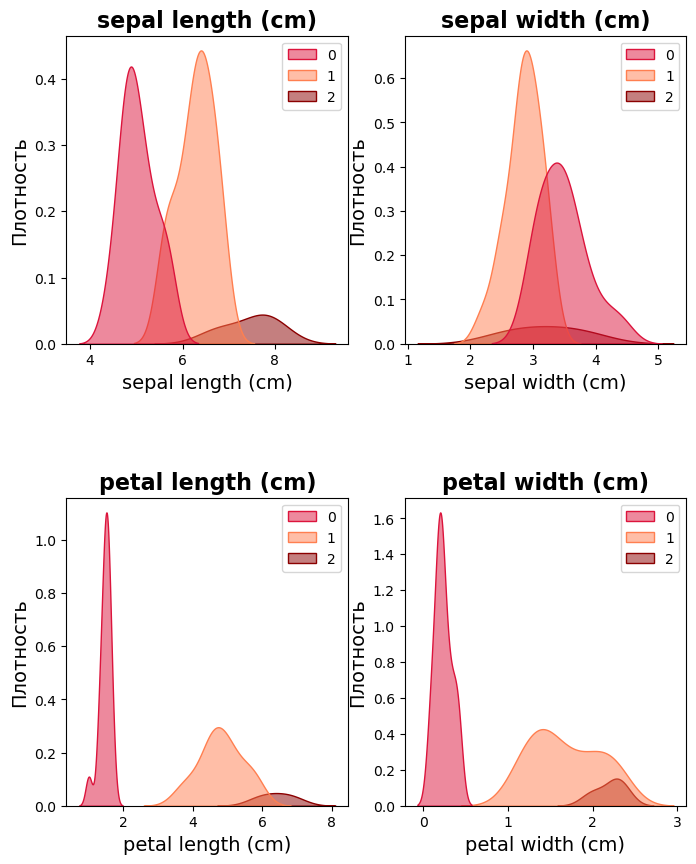

In [657]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(2,2, figsize = (8,10))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    
    sns.kdeplot(data=X_sampled,
                 palette=['#DC143C', '#FF7F50', '#8B0000'],
                 x=column,
                 fill=True,
                 alpha=0.5,
                 hue=pred_k_sampled,
                 ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)

plt.show()

## Вывод

В ходе работы был выполнен импорт данных о различных химических характеристиках цветов ирисов. Данные были стандартизированы для адекватной кластеризации, и были применены методы визуализации, такие как тепловые карты и графики распределения, что позволило выявить взаимосвязи между признаками.

Была проведена кластеризация с использованием метода KMeans, агломеративной кластеризации и спектральной кластеризации, в результате чего выделены три кластера, соответствующие различным видам ирисов.

Для оценки точности кластеризации использовался индекс Rand, который показал хорошие результаты для всех применяемых методов кластеризации.

Таким образом, работа продемонстрировала успешное применение методов анализа и визуализации данных в задаче кластеризации.